# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


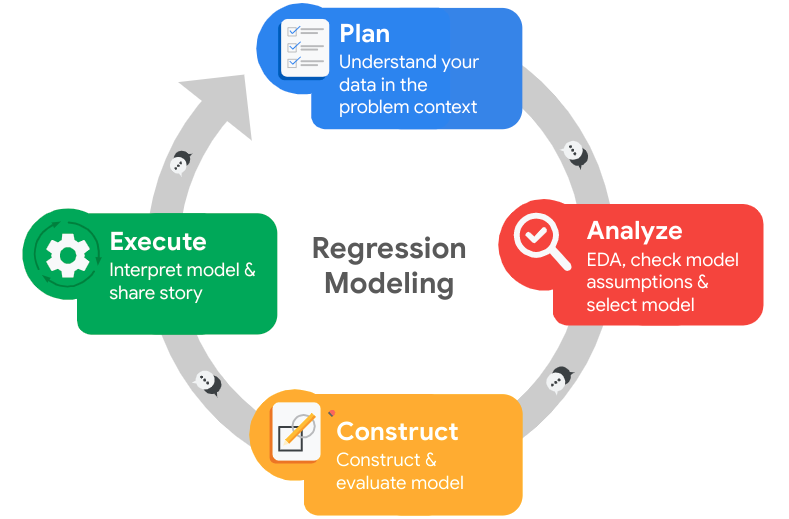

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### My Answers for the above questions after executing the below steps
- Human resources department
- Finding the major causes of the employee turnover and the suggestions resulting from this analysis might improve the employee retention
- Most of the columns are numeric, only the department and the salary are categorical variables
- I found seaborn's box plot useful
- I have removed only duplicates considering they are actually duplicates after going through the columns. I also have not removed any outliers for now.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
rename_dict = {'Work_accident': 'work_accident', 'Department': 'department',}
df0 = df0.rename(columns = rename_dict)
# df0.head()

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated(keep = False).any()

True

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
print(df0[df0.duplicated(keep = False)].shape)
df0[df0.duplicated(keep = False)].head(10)

(5346, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
print(df0[df0.duplicated(keep = 'first')].shape)

(3008, 10)


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df1.shape)
df1.head()

(11991, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
11991 + 3008

14999

### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Detect outliers for tenure')

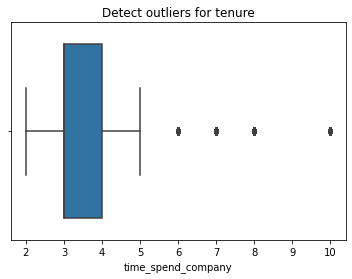

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df1['time_spend_company'])
plt.title('Detect outliers for tenure')


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#from the above graph 75th percentile is  4 and the upper limit is 5, so above 5 is considered as outlier (since there is not any minimum outlier)
print(df1[df1['time_spend_company'] > 5].shape)

#25th percentile
perc_25 = df1['time_spend_company'].quantile(0.25)

#75th percentile
perc_75 = df1['time_spend_company'].quantile(0.75)

#IQR
IQR = perc_75 - perc_25

# df1[(df1['time_spend_company'] >= perc_25) & (df1['time_spend_company'] <= perc_75]
                                                    
#limits
l_lt = perc_25 - 1.5*IQR
u_lt = perc_75 + 1.5*IQR

perc_25, perc_75, l_lt, u_lt

(824, 10)


(3.0, 4.0, 1.5, 5.5)

In [15]:
print("Actual maximum and minimum : ", df1['time_spend_company'].max(), df1['time_spend_company'].min())
print("Calculated upper and lower limit : ", u_lt, l_lt)
print("Number of outliers :", df1[(df1['time_spend_company'] > u_lt) | (df1['time_spend_company'] < l_lt)].shape)


Actual maximum and minimum :  10 2
Calculated upper and lower limit :  5.5 1.5
Number of outliers : (824, 10)


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize = True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Number of Projects counts with respect to employee left or not')

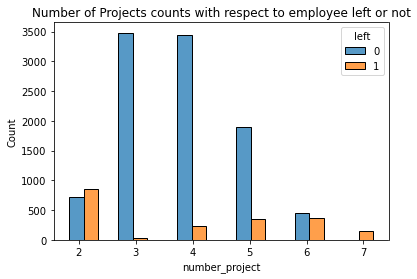

In [18]:

sns.histplot(df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3)
plt.title('Number of Projects counts with respect to employee left or not')

- **As per the above histogram, there are more number of employees stayed when their number of projects are around 3 to 5. Many employees left if the number is below or above that.** 
- **We can see that except the minimum number of project which is 2 (assuming those are the employees let go by the company since that's also in the data), the employee leaving rate increases with increasing number of projects and when it reaches maximum, there are no employees who stayed** 

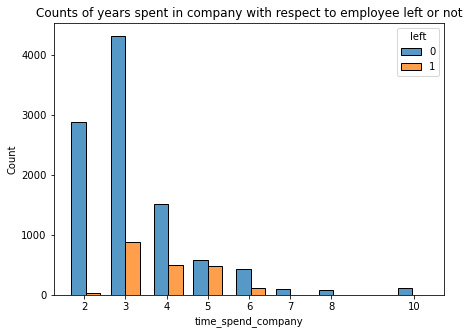

In [19]:


plt.figure(figsize=(7,5))
sns.histplot(df1, x = 'time_spend_company', hue = 'left', multiple = 'dodge', shrink = 8)
plt.title('Counts of years spent in company with respect to employee left or not')
plt.xticks(df1.time_spend_company.unique())
plt.show()

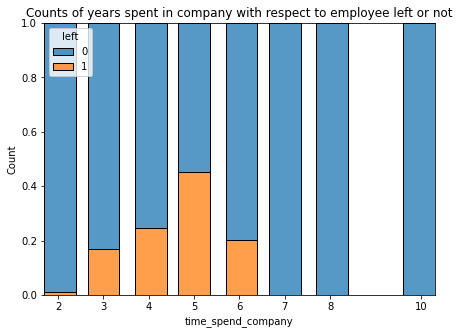

In [20]:

plt.figure(figsize=(7,5))
sns.histplot(df1, x = 'time_spend_company', hue = 'left', multiple = 'fill', shrink = 8)
plt.title('Counts of years spent in company with respect to employee left or not')
plt.xticks(df1.time_spend_company.unique())
plt.show()

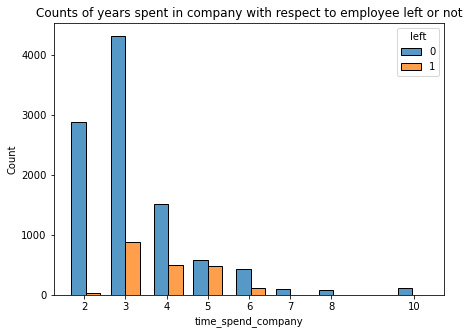

In [21]:

plt.figure(figsize=(7,5))
sns.histplot(df1, x = 'time_spend_company', hue = 'left', multiple = 'dodge', shrink = 8)
plt.title('Counts of years spent in company with respect to employee left or not')
plt.xticks(df1.time_spend_company.unique())
plt.show()

- **The proportion between the number of staying with leaving is reduced as the years go up.**
- **We can tell that number of employees leaving is proportionally higher compared to staying when the years spent in the company increase until 5th year.** 
- **But the employees who spent the longest number of years did not leave. It's kind of both linear and non-linear pattern, curious to see what will be the model's direction**

**Years spent in company vs average monthly hours**

Text(0.5, 1.0, 'Years spent in company vs average monthly hours')

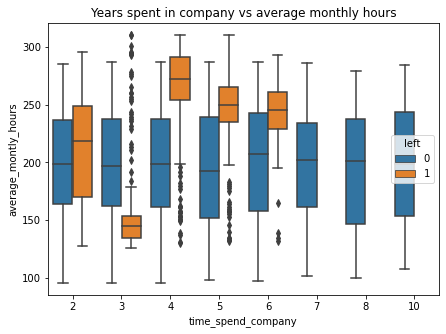

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x = df1['time_spend_company'], y = df1['average_montly_hours'], hue =df1['left'])
plt.title('Years spent in company vs average monthly hours')


Text(0.5, 1.0, 'Years spent in company vs average monthly hours')

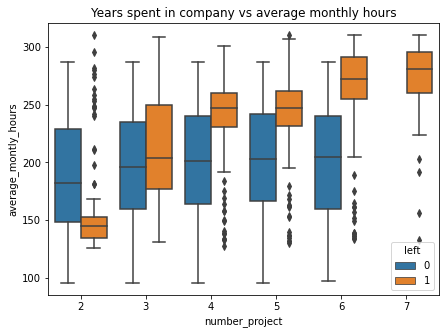

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x = df1['number_project'], y = df1['average_montly_hours'], hue =df1['left'])
plt.title('Years spent in company vs average monthly hours')


- **It's a very interesting and an obvious pattern in the above graph. Just with respect to the number of projects, when it increases, the mean number of employees leaving is getting higher.**
- **We also can see the people are not leaving when their monthly hours is the same even though the their number of projects increase.**
- **So, it's clear that people are leaving only when the number of projects and their monthly hours both increase at the same time**
- **We also can see the employees those have 2 number of projects with less monthly hours have also left. They may be the employees that are let go or employees who have given notice**

Text(0.5, 1.0, 'Satisfaction level vs average monthly hours')

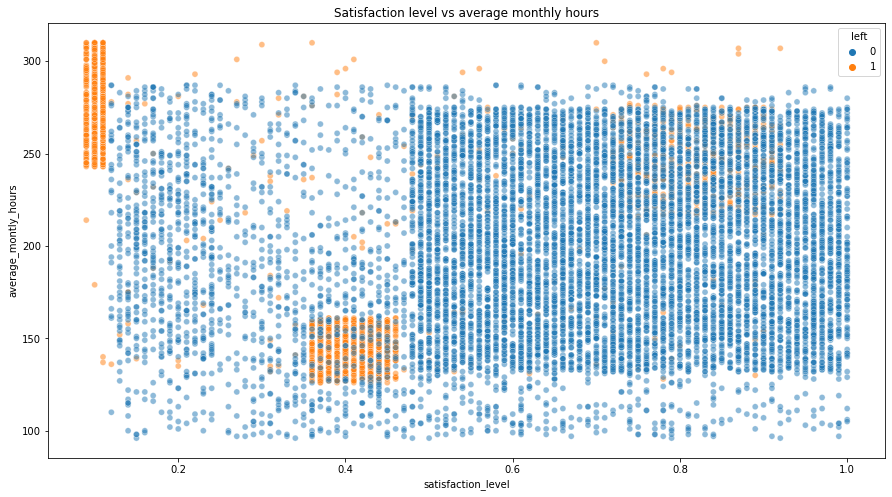

In [24]:
# We will check their satisfaction level with respect to their monthly hours

plt.figure(figsize=(15,8))
sns.scatterplot(x = df1['satisfaction_level'], y = df1['average_montly_hours'], hue =df1['left'], alpha = 0.5)
plt.title('Satisfaction level vs average monthly hours')

- **It's clear from the above graph, the satisfaction level is very low when the average monthly hours are very high and many left employees fall under this category.**
- **Very few employees who left and had higher average monthly hours still gave higher satifaction level.**
- **We can see some employees who left, marked satifaction level as low even when their average monthly hours is very less. We can speculate that these people had some other issues and don't wanted to work more hours too. We can further analyze to see what was their reason**  

In [25]:
## Filtering only those employees that are left even though monthly hours is less in above graph
set_1 = df1[(df1['average_montly_hours'] >=125) & (df1['average_montly_hours'] <=175) &
    (df1['satisfaction_level'] >=0.3) & (df1['satisfaction_level'] <=0.5)]
set_1.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231,1231
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343,681
mean,0.413331,0.551495,2.498781,146.216084,3.099106,0.091795,0.687246,0.009748,NaN,NaN
std,0.045218,0.116823,0.985978,12.277368,0.900726,0.288854,0.463803,0.098290,NaN,NaN
min,0.300000,0.360000,2.000000,125.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.380000,0.480000,2.000000,136.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.410000,0.520000,2.000000,146.000000,3.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,0.440000,0.570000,3.000000,155.000000,3.000000,0.000000,1.000000,0.000000,NaN,NaN


In [26]:
#filtering the rest and describing to see the variable wise difference between them
set_2 = df1[~((df1['average_montly_hours'] >=125) & (df1['average_montly_hours'] <=175) &
    (df1['satisfaction_level'] >=0.3) & (df1['satisfaction_level'] <=0.5))]
set_2.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
count,10760.000000,10760.000000,10760.000000,10760.000000,10760.000000,10760.000000,10760.000000,10760.000000,10760,10760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2896,5059
mean,0.654407,0.735581,3.952045,206.680855,3.395260,0.161431,0.106413,0.017751,NaN,NaN
std,0.241999,0.162918,1.086262,47.470797,1.367569,0.367945,0.308379,0.132051,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.540000,0.600000,3.000000,168.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.700000,0.740000,4.000000,209.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.840000,0.880000,5.000000,247.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**The promotion_last_5years variable's mean seems to be different in both sets, but to know its significance, let's see the actual range of the variable and it's unique values**

In [27]:
# promotion_last_5years seemed to be a variable between 0 and 1, try binning 
df2 = df1.copy()
df2['promotion_last_5years_bin'] = pd.qcut(df2['promotion_last_5years'], q = 1)
df2.groupby(['promotion_last_5years_bin', 'left']).count()['satisfaction_level']


promotion_last_5years_bin  left
(-0.001, 1.0]              0       10000
                           1        1991
Name: satisfaction_level, dtype: int64

**As we can see only one bin is possible. It seems like there are multiple records with same value but looks like a continous variable, so let's simply group it**

In [28]:
df1.groupby(['promotion_last_5years', 'left']).count()['satisfaction_level']

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: satisfaction_level, dtype: int64

- **It's just a categorical variable. This is why it's very important to read the data dictionary carefully. It already has stated as** "Whether or not the employee was promoted in the last 5 years" **and I missed to notice that**
- **So, now we will just plot this promotion variable with left variable between the two sets that we defined**

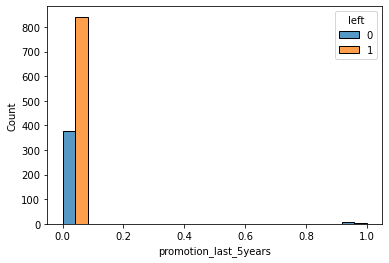

In [29]:
sns.histplot(x = set_1['promotion_last_5years'], hue = set_1['left'], multiple = 'dodge')

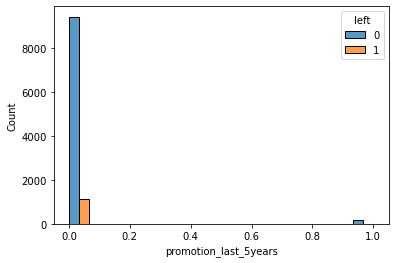

In [30]:
sns.histplot(x = set_2['promotion_last_5years'], hue = set_2['left'], multiple = 'dodge')

- **We can see that in the first set even though their monthly hours is low, the employees marked satisfaction level low and left the company specifically because of the promotion has not happened in last 5 years**

In [31]:
# df2 = df1.copy()
df2['last_evaluation_bin'] = pd.qcut(df2['last_evaluation'], q= 10)
df2.groupby(['last_evaluation_bin', 'left']).count()['satisfaction_level']

last_evaluation_bin  left
(0.359, 0.5]         0       1032
                     1        398
(0.5, 0.54]          0        721
                     1        275
(0.54, 0.59]         0       1008
                     1        203
(0.59, 0.65]         0       1140
                     1         21
(0.65, 0.72]         0       1283
                     1         19
(0.72, 0.78]         0       1148
                     1         62
(0.78, 0.84]         0       1022
                     1        208
(0.84, 0.89]         0        864
                     1        262
(0.89, 0.95]         0        999
                     1        295
(0.95, 1.0]          0        783
                     1        248
Name: satisfaction_level, dtype: int64

Text(0.5, 1.0, "Last evaluation's Histogram")

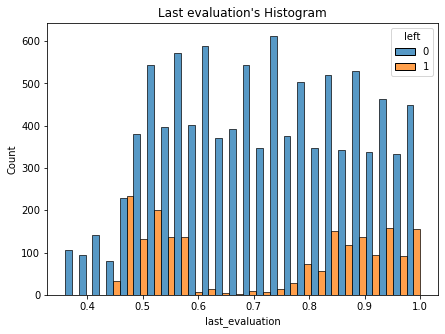

In [32]:
# Performance review vs employee leaving
plt.figure(figsize=(7,5))
sns.histplot(x = df2['last_evaluation'], hue =df2['left'], multiple = 'dodge')
plt.title('Last evaluation\'s Histogram')


Text(0.5, 1.0, "Last evaluation's Histogram")

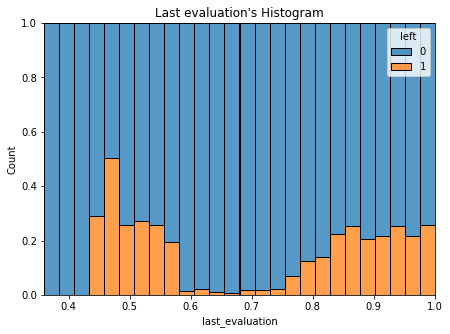

In [33]:
# Performance review vs employee leaving
plt.figure(figsize=(7,5))
sns.histplot(x = df2['last_evaluation'], hue =df2['left'], multiple = 'fill')
plt.title('Last evaluation\'s Histogram')


- **People getting mediocre evaluation did not leave the company much**
- **But employees who got very high and very low ratings both left the company in the same rate**

Text(0.5, 1.0, 'Salary')

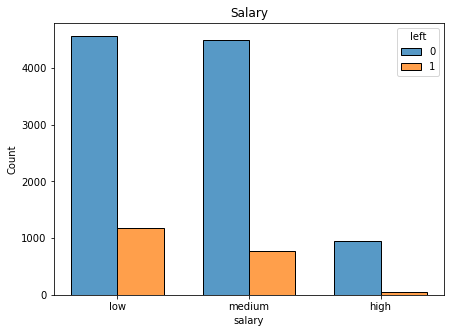

In [34]:
# Salary vs left 
plt.figure(figsize=(7,5))
sns.histplot(x = df1['salary'], hue =df1['left'], multiple = 'dodge', shrink = 0.7)
plt.title('Salary')

**It's clear that if the salary is low, the count of the employee leaving the company is high as expected**

Text(0.5, 1.0, 'Salary vs tenure')

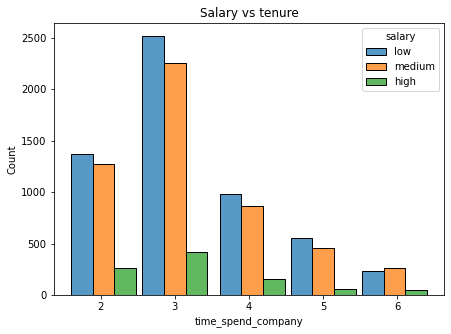

In [35]:
# Salary vs tenure 
plt.figure(figsize=(7,5))
set_3 = df1[df1['time_spend_company'] < 7]
set_4 = df1[df1['time_spend_company'] >= 7]
sns.histplot(x = set_3['time_spend_company'], hue =set_3['salary'], multiple = 'dodge', shrink  = 10)
plt.title('Salary vs tenure')

Text(0.5, 1.0, 'Salary vs tenure')

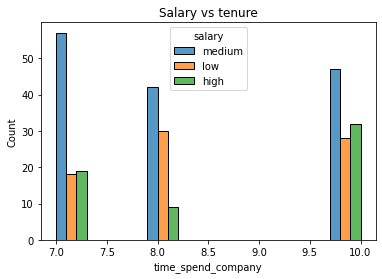

In [36]:
sns.histplot(x = set_4['time_spend_company'], hue =set_4['salary'], multiple = 'dodge', shrink  = 1)
plt.title('Salary vs tenure')

Text(0.5, 1.0, 'Salary vs tenure')

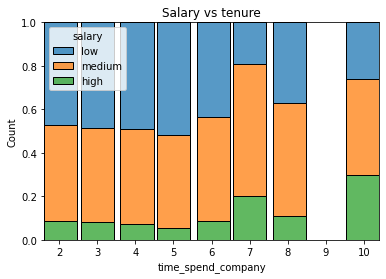

In [37]:
sns.histplot(x = df1['time_spend_company'], hue =df1['salary'], multiple = 'fill', shrink  = 10)
plt.title('Salary vs tenure')

**The proportion of low, medium vs high salaried employees are similar till 6th year, but after that medium and higher salaried proportions slightly increase but not by a lot**

Text(0.5, 1.0, 'Departmentwise employee retention')

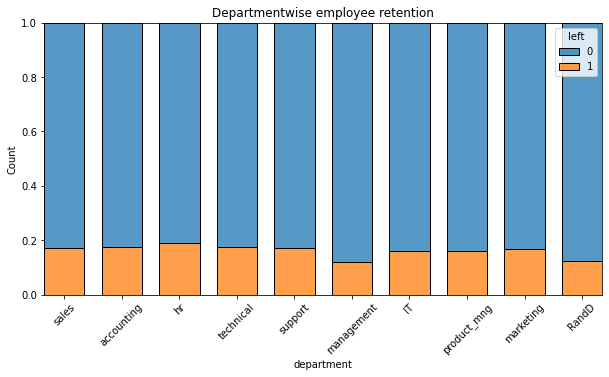

In [38]:
# Department vs left 
plt.figure(figsize=(10,5))
sns.histplot(x = df1['department'], hue =df1['left'], multiple = 'fill', shrink = 0.7, )
plt.xticks(rotation = 45)
plt.title('Departmentwise employee retention')

In [39]:
df1.groupby(['department','left']).count()['satisfaction_level']/df1.groupby(['department']).count()['satisfaction_level']

department   left
IT           0       0.838115
             1       0.161885
RandD        0       0.877522
             1       0.122478
accounting   0       0.824477
             1       0.175523
hr           0       0.811980
             1       0.188020
management   0       0.880734
             1       0.119266
marketing    0       0.833581
             1       0.166419
product_mng  0       0.839650
             1       0.160350
sales        0       0.830195
             1       0.169805
support      0       0.828666
             1       0.171334
technical    0       0.826203
             1       0.173797
Name: satisfaction_level, dtype: float64

**The departmentwise ratio of employee staying vs leaving remains the same**

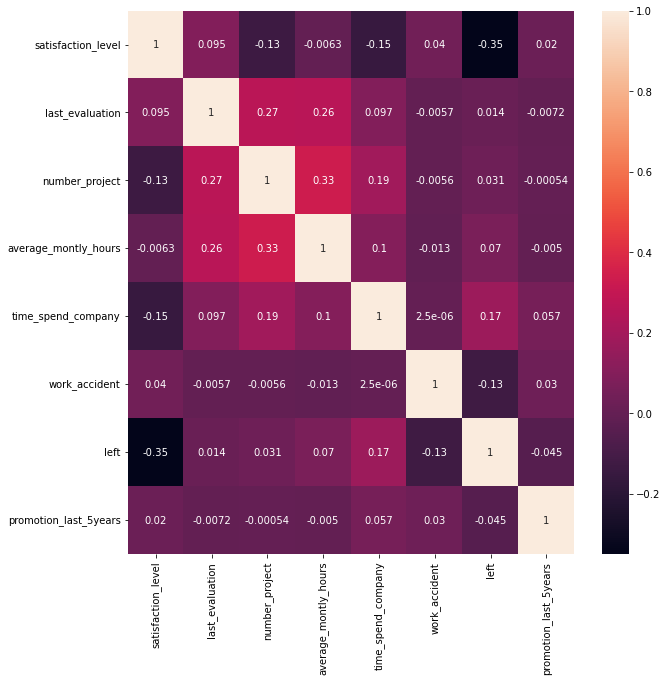

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), annot = True)

- **Satisfaction level is negatively correlated with employee leaving. Meaning higher satisfaction leads to lower number of employees leaving**
- **Average monthly hours is positively correlated with number of projects**
- **Number of projects is positively correlated with the last evaluation**

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

**All the insights are added below each graph in the above step**

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

**We are going to predict whether an employee will leave the company or not with the variables that's given in the dataset.**

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

1. Logistic Regression
2. RandomForest
3. XGBoost
4. Naive Bayes

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Feature Transformation

In [41]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [43]:
#department and Salary
print(df1['department'].value_counts())
print(df1['salary'].value_counts())


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64
low       5740
medium    5261
high       990
Name: salary, dtype: int64


In [44]:
df_enc = df1.copy()
df_enc['salary'].astype('category').cat.set_categories(['low','medium', 'high']).cat.codes

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Length: 11991, dtype: int8

In [45]:
#Encode department and Salary
df_enc = df1.copy()
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low','medium', 'high']).cat.codes

#department

df_enc = pd.get_dummies(df_enc, columns = ['department'], drop_first = True)

In [46]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [47]:
df_enc.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [48]:
## remove outliers


print(df_enc[(df_enc['time_spend_company'] > u_lt) | (df1['time_spend_company'] < l_lt)].shape)

df_enc.loc[(df_enc['time_spend_company'] > u_lt), 'time_spend_company']= u_lt
           
df_enc.loc[(df_enc['time_spend_company'] < l_lt), 'time_spend_company']= l_lt

(824, 18)


In [49]:
from sklearn.model_selection import train_test_split


y = df_enc['left']
X = df_enc.drop(columns = ['left'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 17), (2998, 17), (8993,), (2998,))

In [51]:
y_train.value_counts(normalize = True), y_test.value_counts(normalize = True)

(0    0.833982
 1    0.166018
 Name: left, dtype: float64,
 0    0.833889
 1    0.166111
 Name: left, dtype: float64)

#### Logistic Regression

In [52]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0, max_iter = 500)

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = lr.predict(X_test)

In [54]:
lr_coeff = pd.DataFrame(zip(X_train.columns, lr.coef_[0]))
lr_coeff

,0,1
0,satisfaction_level,-3.809033
1,last_evaluation,0.343971
2,number_project,-0.328045
3,average_montly_hours,0.003806
4,time_spend_company,0.606652
5,work_accident,-1.586421
6,promotion_last_5years,-1.069557
7,salary,-0.629262
8,department_RandD,-0.329801
9,department_accounting,-0.009906


In [55]:
import pickle
pickle.dump(lr, open('lr_1.pkl', 'wb'))

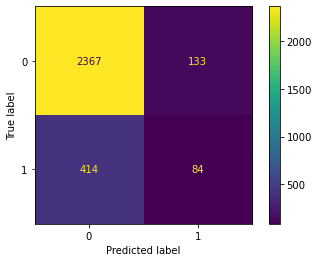

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lr.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [57]:
print(classification_report(y_test, y_pred, output_dict = True))

{'0': {'precision': 0.8511326860841424, 'recall': 0.9468, 'f1-score': 0.8964211323612953, 'support': 2500}, '1': {'precision': 0.3870967741935484, 'recall': 0.1686746987951807, 'f1-score': 0.23496503496503496, 'support': 498}, 'accuracy': 0.8175450300200133, 'macro avg': {'precision': 0.6191147301388453, 'recall': 0.5577373493975903, 'f1-score': 0.5656930836631651, 'support': 2998}, 'weighted avg': {'precision': 0.7740513371443439, 'recall': 0.8175450300200133, 'f1-score': 0.7865461702187544, 'support': 2998}}


In [58]:
lr_report = classification_report(y_test, y_pred,  output_dict = True)
pd.DataFrame(lr_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.851133,0.387097,0.817545,0.619115,0.774051
recall,0.946800,0.168675,0.817545,0.557737,0.817545
f1-score,0.896421,0.234965,0.817545,0.565693,0.786546
support,2500.000000,498.000000,0.817545,2998.000000,2998.000000


In [104]:
results_df = pd.DataFrame(lr_report).reset_index().rename(columns = {'index': 'scores'})
results_df['Model_Type'] = 'LR'

results_df = results_df.set_index('Model_Type')
results_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
LR,precision,0.851133,0.387097,0.817545,0.619115,0.774051
LR,recall,0.946800,0.168675,0.817545,0.557737,0.817545
LR,f1-score,0.896421,0.234965,0.817545,0.565693,0.786546
LR,support,2500.000000,498.000000,0.817545,2998.000000,2998.000000


**Many variables are non-linear to the target, that's why logistic regression did not perform well**

#### XGBoost model

In [60]:
### YOUR CODE HERE ###
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state = 0)


In [61]:
X_train.shape

(8993, 17)

In [62]:
scoring = {'accuracy', 'f1', 'precision', 'recall'}

In [63]:
cv_params = {
    'max_depth' : [3,5,9],
    'min_child_weight' : [5,10],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [10,50,100, 500],
}

In [64]:
from sklearn.model_selection import GridSearchCV

xgb_gs = GridSearchCV(xgb_clf, param_grid = cv_params, cv = 5, scoring = scoring, refit = 'f1')

In [73]:
import pickle
# pickle.dump(xgb_gs, open('xgb_1.pkl', 'wb'))

xgb_gs = pickle.load(open('xgb_1.pkl', 'rb'))

In [65]:
# xgb_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [74]:
xgb_gs.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 9,
 'min_child_weight': 5,
 'n_estimators': 10,
 'subsample': 0.7}

In [75]:
xgb_gs.best_score_

0.9378936180365756

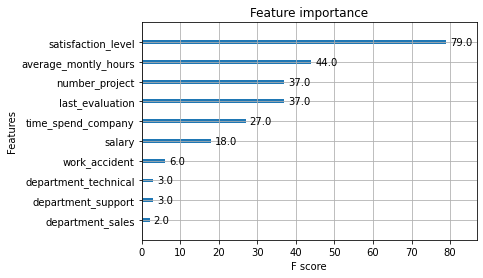

In [76]:
from xgboost import plot_importance
plot_importance(xgb_gs.best_estimator_)

In [77]:
y_xgb_pred = xgb_gs.predict(X_test)

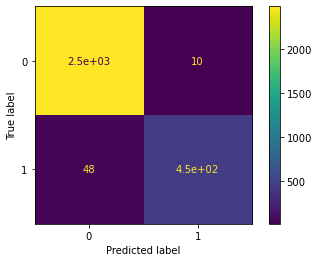

In [78]:
cm = confusion_matrix(y_test, y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_gs.classes_)
disp.plot()

**There is a good split between True Positive and  False Negative, so we can expect an improvement in the recall score than the LR model**

In [79]:
xgb_report_1 = classification_report(y_test, y_xgb_pred,  output_dict = True)

In [105]:
xgb_report_df = pd.DataFrame(xgb_report_1).reset_index().rename(columns = {'index': 'scores'})

xgb_report_df['Model_Type'] = 'XGB'

xgb_report_df = xgb_report_df.set_index('Model_Type')
xgb_report_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
XGB,precision,0.981087,0.978261,0.980654,0.979674,0.980618
XGB,recall,0.996000,0.903614,0.980654,0.949807,0.980654
XGB,f1-score,0.988487,0.939457,0.980654,0.963972,0.980343
XGB,support,2500.000000,498.000000,0.980654,2998.000000,2998.000000


In [108]:
results_df = pd.concat([results_df, xgb_report_df])

results_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
LR,precision,0.851133,0.387097,0.817545,0.619115,0.774051
LR,recall,0.946800,0.168675,0.817545,0.557737,0.817545
LR,f1-score,0.896421,0.234965,0.817545,0.565693,0.786546
LR,support,2500.000000,498.000000,0.817545,2998.000000,2998.000000
LR_2,precision,0.892857,0.630178,0.863242,0.761517,0.849223
LR_2,recall,0.950000,0.427711,0.863242,0.688855,0.863242
LR_2,f1-score,0.920543,0.509569,0.863242,0.715056,0.852276
LR_2,support,2500.000000,498.000000,0.863242,2998.000000,2998.000000
XGB,precision,0.981087,0.978261,0.980654,0.979674,0.980618


#### Feature Engineering

In [82]:
df_enc['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [83]:
df_enc.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4.0,0,1,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [84]:
df_enc.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11990,0.49,0.49,4,212,5.5,0,0,0,1,0,0,0,0,0,1,0,0,0
11991,0.60,0.53,2,235,5.5,0,0,0,1,0,0,0,0,0,0,0,0,0
11992,0.62,0.85,3,237,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0
11993,0.64,0.50,4,253,5.5,0,0,1,2,0,0,0,1,0,0,0,0,0
11994,0.22,0.94,3,193,5.5,0,0,1,2,0,0,0,1,0,0,0,0,0
11995,0.90,0.55,3,259,5.5,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,5.5,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,5.5,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,5.5,0,0,1,2,0,0,0,0,1,0,0,0,0
11999,0.50,0.73,4,180,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
df2 = df_enc.copy()

- It's clear in the EDA that people are leaving only when the number of projects and their monthly hours both increase at the same time, so create hours * project and hours per project variable.

E.g hours = 157, number_project = 2, left = 1
hours * project = 157 x 2 = 314
hours / project = 157/2 = 78.5

E.g hours = 272, number_project = 4, left = 1
hours * project = 272 x 4 = 1088
hours / project = 272/4 = 68

E.g hours = 212, number_project = 4, left = 0
hours * project = 212 x 4 = 848
hours / project = 212/4 = 53

E.g hours = 193, number_project = 3, left = 0
hours * project = 193 x 3 = 579
hours / project = 193/3 = 64.3

Since after checking correlation, we can create any one. Hours * project makes sense. since both increasing pattern can be captured here.

- let_go variable number of projects < 2 and monthly hours less than 160
- promotion last 5 years 0  and monthly hours less than 160
- last_evaluation
    1. People getting mediocre evaluation did not leave the company much
    2. But employees who got very high and very low ratings both left the company in the same rate
    3. last_evaluation_0.6_0.78 (take mean and see)


In [86]:
pd.DataFrame({'a' : df2['average_montly_hours'] * df2['number_project'], 'b': df2['average_montly_hours'] / df2['number_project'], 'left':df2['left']
             ,'d': df2['average_montly_hours'], 'e' : df2['number_project']}).corr()


,a,b,left,d,e
a,1.000000,-0.258317,0.156432,0.756203,0.844418
b,-0.258317,1.000000,0.067178,0.392827,-0.683100
left,0.156432,0.067178,1.000000,0.070409,0.030928
d,0.756203,0.392827,0.070409,1.000000,0.331516
e,0.844418,-0.683100,0.030928,0.331516,1.000000


In [87]:
np.mean(df2[(df2['last_evaluation'] > 0.6) & (df2['last_evaluation'] < 0.78)]['last_evaluation']), np.mean(df2[(df2['last_evaluation'] <= 0.6) | (df2['last_evaluation'] >= 0.78)]['last_evaluation'])

(0.6905565638233616, 0.7266275187104208)

In [88]:
print(df2[(df2['last_evaluation'] > 0.6) & (df2['last_evaluation'] < 0.78)]['left'].value_counts())
print(df2[(df2['last_evaluation'] <= 0.6) | (df2['last_evaluation'] >= 0.78)]['left'].value_counts())

print(df2[~((df2['last_evaluation'] > 0.6) & (df2['last_evaluation'] < 0.78))]['left'].value_counts())

0    3229
1      77
Name: left, dtype: int64
0    6771
1    1914
Name: left, dtype: int64
0    6771
1    1914
Name: left, dtype: int64


In [89]:
##New Variables

# hours_x_project
df2['hours_x_project'] = df2['average_montly_hours'] * df2['number_project']

# let_go
df2['let_go'] = ((df2['number_project'] < 2) & (df2['average_montly_hours'] < 170)).astype(int)

#promotion last 5 years 0  and monthly hours less than 160
df2['promotion_last_5years_hours_new'] = ((df2['promotion_last_5years'] == 0) & (df2['average_montly_hours'] < 170)).astype(int)

# last_evaluation_0
df2['last_evaluation_0.6_0.78'] = ((df2['last_evaluation'] > 0.6) & (df2['last_evaluation'] < 0.78)).astype(int)

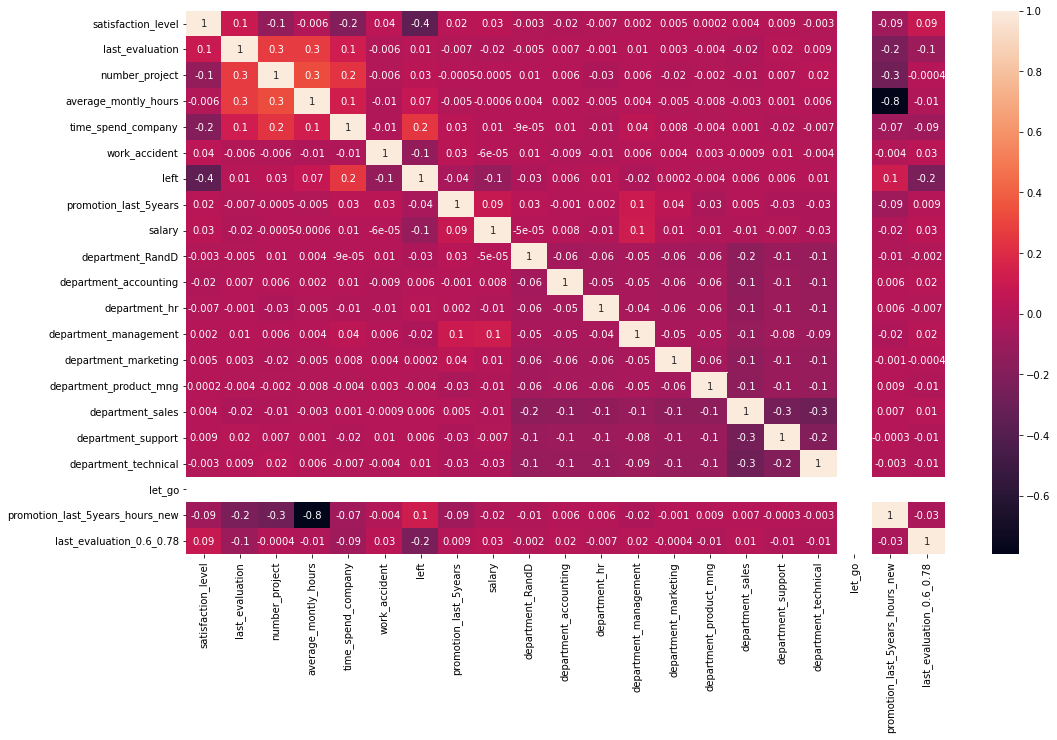

In [141]:
plt.figure(figsize = (17,10))
sns.heatmap(df2.corr(), annot = True, fmt='.1g')

In [91]:
#dropping hours_x_project since correlation is high

df2 = df2.drop(columns = ['hours_x_project'])

#### Train test split

In [92]:
from sklearn.model_selection import train_test_split


y = df2['left']
X = df2.drop(columns = ['left'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 20), (2998, 20), (8993,), (2998,))

In [94]:
y_train.value_counts(normalize = True), y_test.value_counts(normalize = True)

(0    0.833982
 1    0.166018
 Name: left, dtype: float64,
 0    0.833889
 1    0.166111
 Name: left, dtype: float64)

#### Logistic regression with Feature Engineering

In [95]:

from sklearn.linear_model import LogisticRegression

lr_1 = LogisticRegression(random_state = 0, max_iter = 500, solver='liblinear')

lr_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_pred = lr_1.predict(X_test)

In [145]:
lr_coeff_1 = pd.DataFrame(zip(X_train.columns, lr_1.coef_[0]))

lr_coeff_1['abs_coeff'] = abs(lr_coeff_1[1])
lr_coeff_1 = lr_coeff_1.sort_values(by = 'abs_coeff', ascending = False).rename(columns = {0: 'variable_name', 1: 'coeff'})

lr_coeff_1

,variable_name,coeff,abs_coeff
0,satisfaction_level,-3.562429,3.562429
18,promotion_last_5years_hours_new,2.967669,2.967669
19,last_evaluation_0.6_0.78,-2.503215,2.503215
5,work_accident,-1.528988,1.528988
4,time_spend_company,0.679760,0.679760
7,salary,-0.619656,0.619656
6,promotion_last_5years,-0.415453,0.415453
2,number_project,-0.311866,0.311866
8,department_RandD,-0.278390,0.278390
11,department_management,-0.216170,0.216170


In [98]:
import pickle
pickle.dump(lr_1, open('lr_2.pkl', 'wb'))

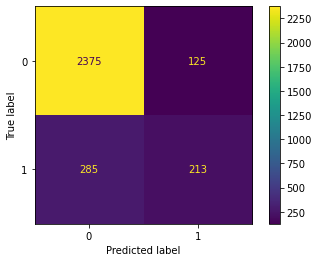

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=lr_1.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lr_1.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [100]:
print(classification_report(y_test, y_pred, output_dict = True))

{'0': {'precision': 0.8928571428571429, 'recall': 0.95, 'f1-score': 0.9205426356589147, 'support': 2500}, '1': {'precision': 0.6301775147928994, 'recall': 0.42771084337349397, 'f1-score': 0.5095693779904307, 'support': 498}, 'accuracy': 0.8632421614409607, 'macro avg': {'precision': 0.7615173288250212, 'recall': 0.688855421686747, 'f1-score': 0.7150560068246727, 'support': 2998}, 'weighted avg': {'precision': 0.8492232353267916, 'recall': 0.8632421614409607, 'f1-score': 0.8522755635045101, 'support': 2998}}


In [101]:
lr_report_1 = classification_report(y_test, y_pred,  output_dict = True)
pd.DataFrame(lr_report_1)

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.630178,0.863242,0.761517,0.849223
recall,0.950000,0.427711,0.863242,0.688855,0.863242
f1-score,0.920543,0.509569,0.863242,0.715056,0.852276
support,2500.000000,498.000000,0.863242,2998.000000,2998.000000


In [106]:
lr_report_df = pd.DataFrame(lr_report_1).reset_index().rename(columns = {'index': 'scores'})
lr_report_df['Model_Type'] = 'LR_2'

lr_report_df = lr_report_df.set_index('Model_Type')
lr_report_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
LR_2,precision,0.892857,0.630178,0.863242,0.761517,0.849223
LR_2,recall,0.950000,0.427711,0.863242,0.688855,0.863242
LR_2,f1-score,0.920543,0.509569,0.863242,0.715056,0.852276
LR_2,support,2500.000000,498.000000,0.863242,2998.000000,2998.000000


In [107]:
results_df = pd.concat([results_df, lr_report_df])

results_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
LR,precision,0.851133,0.387097,0.817545,0.619115,0.774051
LR,recall,0.946800,0.168675,0.817545,0.557737,0.817545
LR,f1-score,0.896421,0.234965,0.817545,0.565693,0.786546
LR,support,2500.000000,498.000000,0.817545,2998.000000,2998.000000
LR_2,precision,0.892857,0.630178,0.863242,0.761517,0.849223
LR_2,recall,0.950000,0.427711,0.863242,0.688855,0.863242
LR_2,f1-score,0.920543,0.509569,0.863242,0.715056,0.852276
LR_2,support,2500.000000,498.000000,0.863242,2998.000000,2998.000000


#### XGBoost model

In [109]:
### YOUR CODE HERE ###
from xgboost import XGBClassifier

xgb_clf_2 = XGBClassifier(random_state = 0)


In [110]:
X_train.shape

(8993, 20)

In [111]:
scoring = {'accuracy', 'f1', 'precision', 'recall'}

In [112]:
cv_params = {
    'max_depth' : [3,5,9],
    'min_child_weight' : [5,10],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [10,50,100, 500],
}

In [113]:
from sklearn.model_selection import GridSearchCV

xgb_gs_2 = GridSearchCV(xgb_clf_2, param_grid = cv_params, cv = 5, scoring = scoring, refit = 'f1')

In [114]:
xgb_gs_2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [115]:
xgb_gs_2.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 9,
 'min_child_weight': 5,
 'n_estimators': 10,
 'subsample': 0.7}

In [116]:
cv_params_set2 = {
    'max_depth' : [3,5],
    'min_child_weight' : [10,40],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [50,100, 500],
}

In [118]:
from sklearn.model_selection import GridSearchCV

xgb_gs_3 = GridSearchCV(xgb_clf_2, param_grid = cv_params_set2, cv = 5, scoring = scoring, refit = 'f1')

In [119]:
xgb_gs_3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [120]:
xgb_gs_3.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 50,
 'subsample': 0.7}

In [122]:
xgb_gs_3.cv_results_['mean_test_f1']

array([0.93077694, 0.93194387, 0.92446748, 0.9148976 , 0.91707052,
       0.91901683, 0.93436874, 0.93196031, 0.92463201, 0.92022331,
       0.92294813, 0.92172074])

In [ ]:
import pickle
pickle.dump(xgb_gs_2, open('xgb_2.pkl', 'wb'))

# xgb_gs_2 = pickle.load(open('xgb_2.pkl', 'wb'))

In [124]:
#first set of grid search is still better
xgb_gs_2.best_score_, xgb_gs_3.best_score_

(0.9394439748948754, 0.9343687399231048)

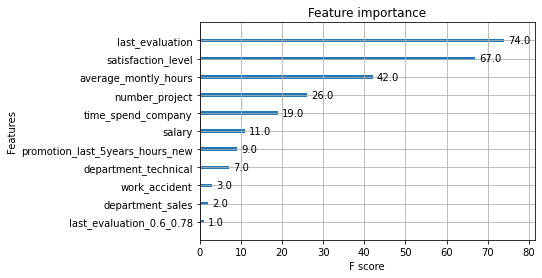

In [125]:
from xgboost import plot_importance
plot_importance(xgb_gs_2.best_estimator_)

In [126]:
y_xgb_pred_2 = xgb_gs_2.predict(X_test)

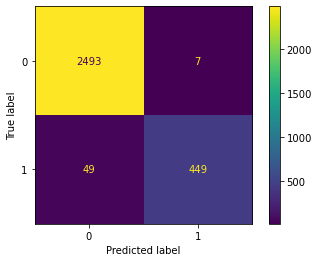

In [136]:
cm = confusion_matrix(y_test, y_xgb_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_gs_2.classes_)
disp.plot(values_format = '')

**There is a good split between True Positive and  False Negative, so we can expect an improvement in the recall score than the LR model**

In [128]:
xgb_report_2 = classification_report(y_test, y_xgb_pred_2,  output_dict = True)

In [129]:
xgb_report_df_2 = pd.DataFrame(xgb_report_2).reset_index().rename(columns = {'index': 'scores'})

xgb_report_df_2['Model_Type'] = 'XGB_2'

xgb_report_df_2 = xgb_report_df_2.set_index('Model_Type')
xgb_report_df_2

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
XGB_2,precision,0.980724,0.984649,0.981321,0.982686,0.981376
XGB_2,recall,0.997200,0.901606,0.981321,0.949403,0.981321
XGB_2,f1-score,0.988893,0.941300,0.981321,0.965097,0.980988
XGB_2,support,2500.000000,498.000000,0.981321,2998.000000,2998.000000


In [130]:
results_df = pd.concat([results_df, xgb_report_df_2])

results_df

,scores,0,1,accuracy,macro avg,weighted avg
Model_Type,,,,,,
LR,precision,0.851133,0.387097,0.817545,0.619115,0.774051
LR,recall,0.946800,0.168675,0.817545,0.557737,0.817545
LR,f1-score,0.896421,0.234965,0.817545,0.565693,0.786546
LR,support,2500.000000,498.000000,0.817545,2998.000000,2998.000000
LR_2,precision,0.892857,0.630178,0.863242,0.761517,0.849223
LR_2,recall,0.950000,0.427711,0.863242,0.688855,0.863242
LR_2,f1-score,0.920543,0.509569,0.863242,0.715056,0.852276
LR_2,support,2500.000000,498.000000,0.863242,2998.000000,2998.000000
XGB,precision,0.981087,0.978261,0.980654,0.979674,0.980618


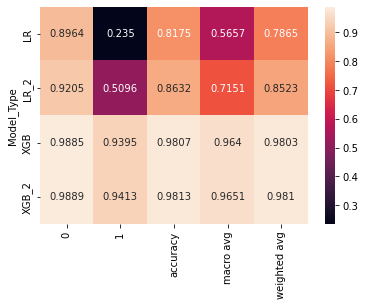

In [138]:
sns.heatmap(results_df[results_df['scores'] == 'f1-score'].drop(columns = 'scores'), annot=True, fmt='.4g',)

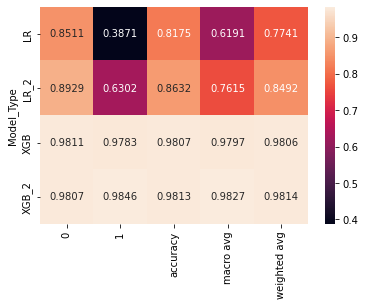

In [139]:
sns.heatmap(results_df[results_df['scores'] == 'precision'].drop(columns = 'scores'), annot=True, fmt='.4g',)

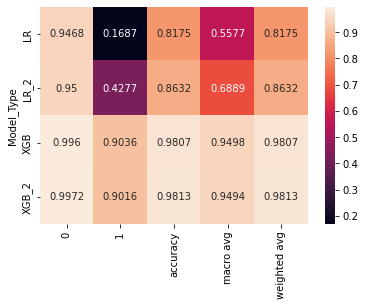

In [140]:
sns.heatmap(results_df[results_df['scores'] == 'recall'].drop(columns = 'scores'), annot=True, fmt='.4g',)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


**Logistic Regression**

On the target to predict the employees that would leave, the logistic regression model achieved precision of 63%, recall of 43%, f1-score of 51% (all weighted averages) on the test set after Feature Engineering.

**XGBoost**

After conducting feature engineering, XGB achieved precision of 98.4%, recall of 90.1%, f1-score of 94.1%  on the test set with a good split between True Positive (predicted that an employee would leave and have actually left in the data) and False positive (predicted that an employee would leave and but actually did not leave in the data).

### Conclusion, Recommendations, Next Steps

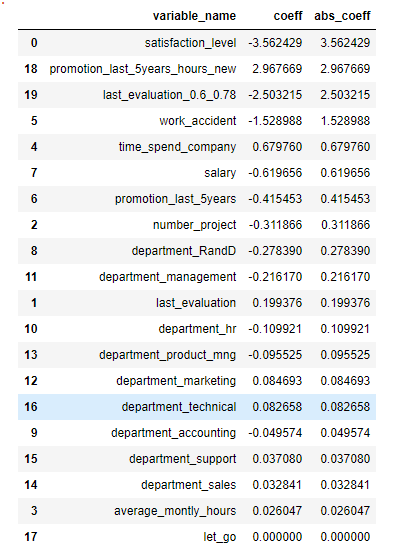



**In order to retain the employees in the company**
1. **Salary package can be increased**
2. **Promotion should be given regardless of the average hours worked. It should be based on the quality of the work.**
3. **Evaluation should be done properly. Mediocre avaerage people are leaving more. Should give more constructive feedbacks and appreciation.**
4. **Number of projects should be limited**
5. **Give overtime pay or don't ask them to work over time. We can see that people who work overtime are leaving the company more.**

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.